<a href="https://colab.research.google.com/github/Modassirnazar/OIBSIP_2/blob/main/Unemploement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unemployment Analysis**

This project delves into the intricate landscape of unemployment in India, employing a data-driven approach to unravel insights and patterns. The analysis utilizes two datasets - one providing an overview of unemployment and the other offering a detailed breakdown up to November 2020. The project unfolds in several key tasks, each contributing to a comprehensive understanding of the unemployment scenario in the country.

**1: Importing Libraries and Loading Data**

 In this task, you import necessary libraries such as NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, and Plotly Express. Then, you load two datasets (df and df2) containing information about unemployment in India.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import calendar

In [44]:
df = pd.read_csv("/content/Unemployment in India.csv")
df2 = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

**2: Exploratory Data Analysis (EDA) with Pandas and Seaborn**

Here, You will perform initial exploration of the data. You check a sample of 5 rows, identify missing values, check for duplicates, and visualize the distribution of data using pie charts, bar charts, and a pair plot with Seaborn.

In [4]:
df.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
354,West Bengal,29-02-2020,Monthly,3.78,26093009,49.51,Rural
214,Meghalaya,30-04-2020,Monthly,8.38,803118,48.83,Rural
693,Tripura,29-02-2020,Monthly,33.88,415339,66.04,Urban
196,Maharashtra,31-12-2019,Monthly,3.03,26357625,50.98,Rural
25,Assam,30-06-2020,Monthly,0.00,7544937,34.38,Rural


In [5]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
735    False
736    False
737    False
738    False
739    False
Length: 740, dtype: bool

In [7]:
df.shape

(740, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    int64  
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 40.6+ KB


In [9]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

<Axes: ylabel='Region'>

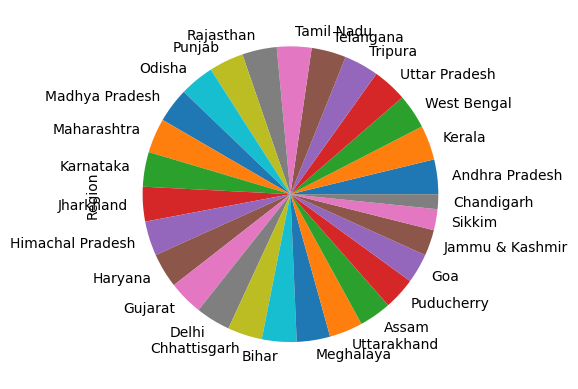

In [11]:
df['Region'].value_counts().plot.pie()

<Axes: >

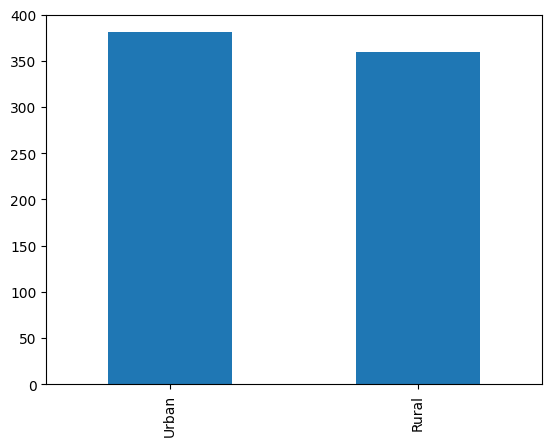

In [14]:
df['Area'].value_counts().plot.bar()

<Axes: ylabel='Region'>

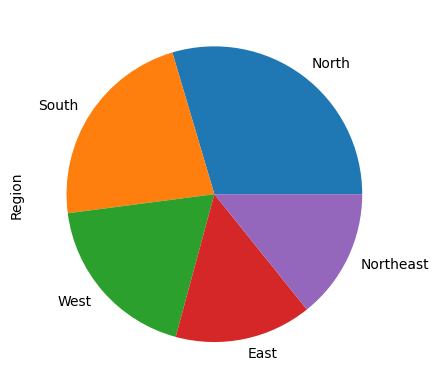

In [51]:
df2['Region'].value_counts().plot.pie()

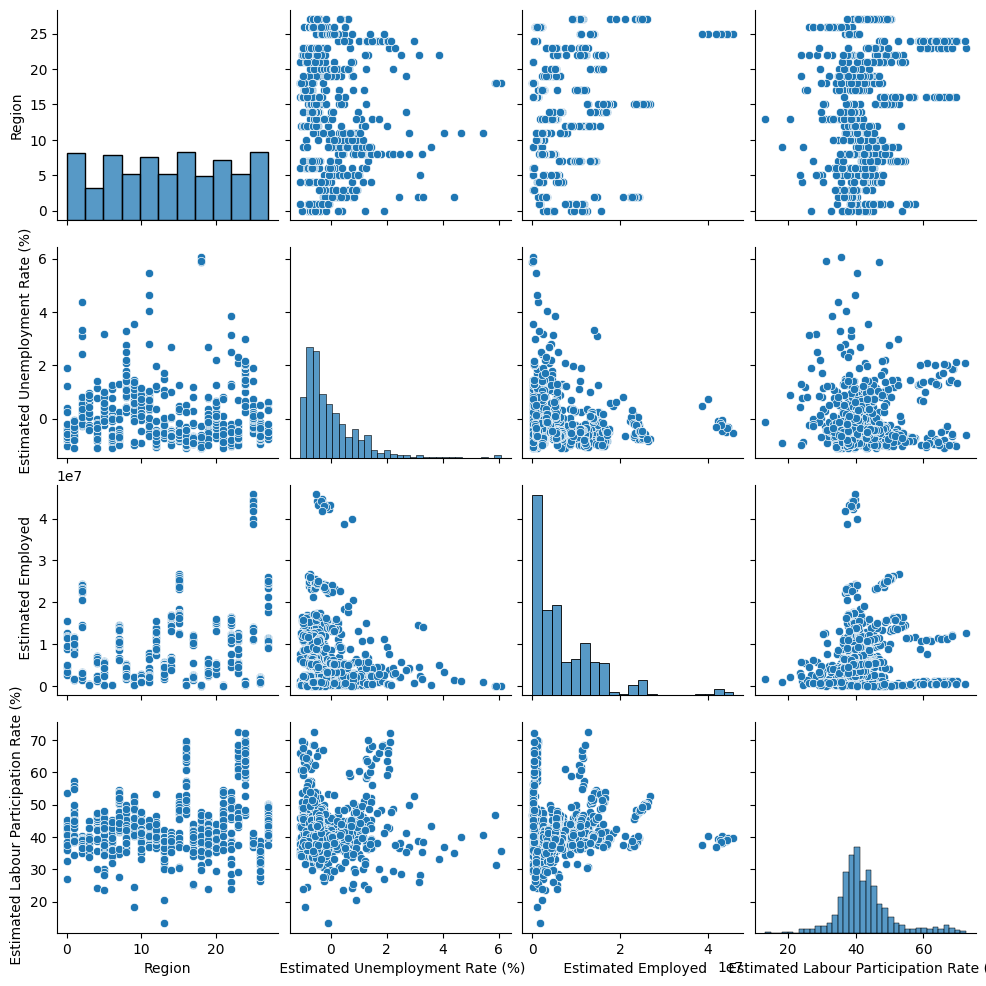

In [23]:
sns.pairplot(df)

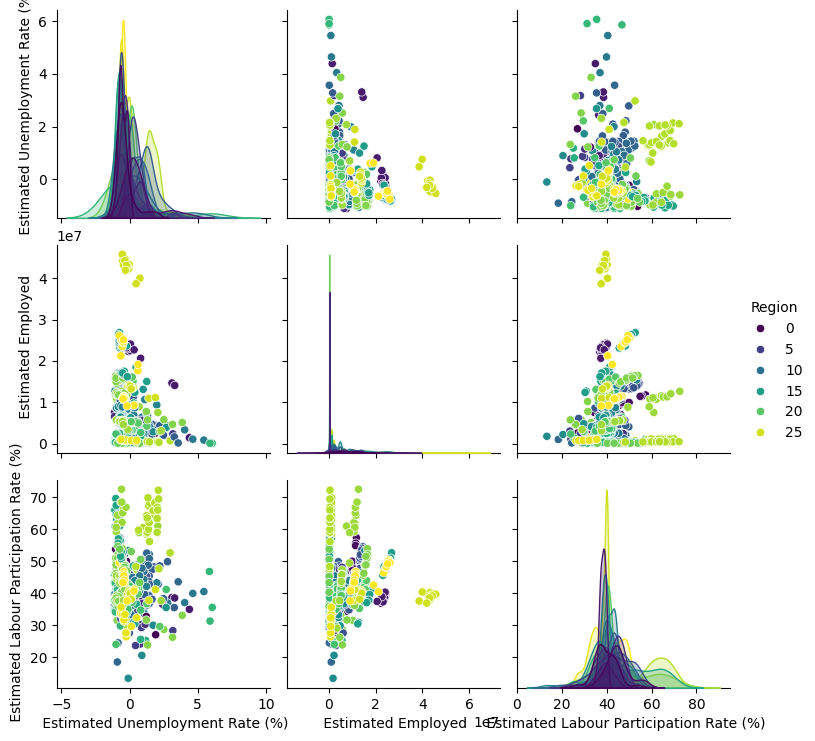

In [26]:
sns.pairplot(df, hue='Region', palette='viridis')

**3: Histograms of Estimated Employment and Unemployment Rates**

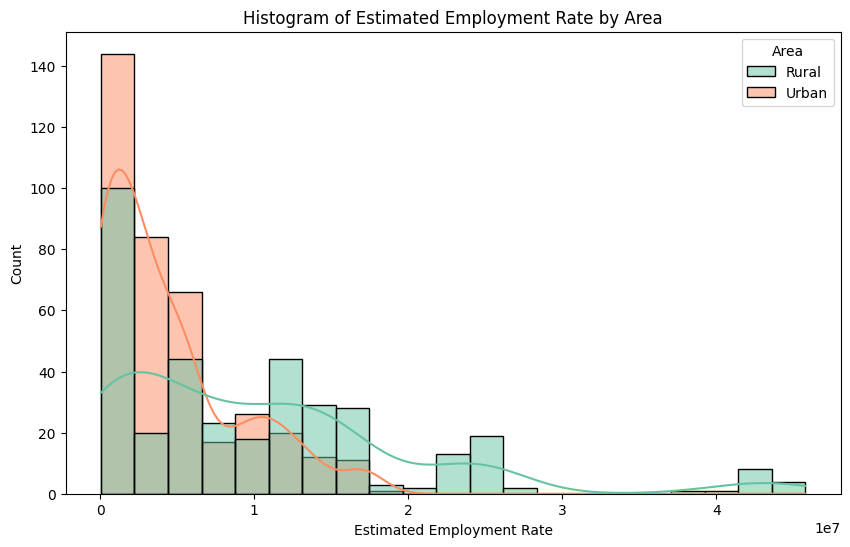

In [37]:
# Histogram of Estimated Employment Rate by Area

plt.style.use("default")

df.columns = ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area']
plt.figure(figsize=(10, 6))
sns.histplot(x=' Estimated Employed', hue="Area", data=df, kde=True, palette="Set2")
plt.title("Histogram of Estimated Employment Rate by Area")
plt.xlabel("Estimated Employment Rate")
plt.ylabel("Count")
plt.show()

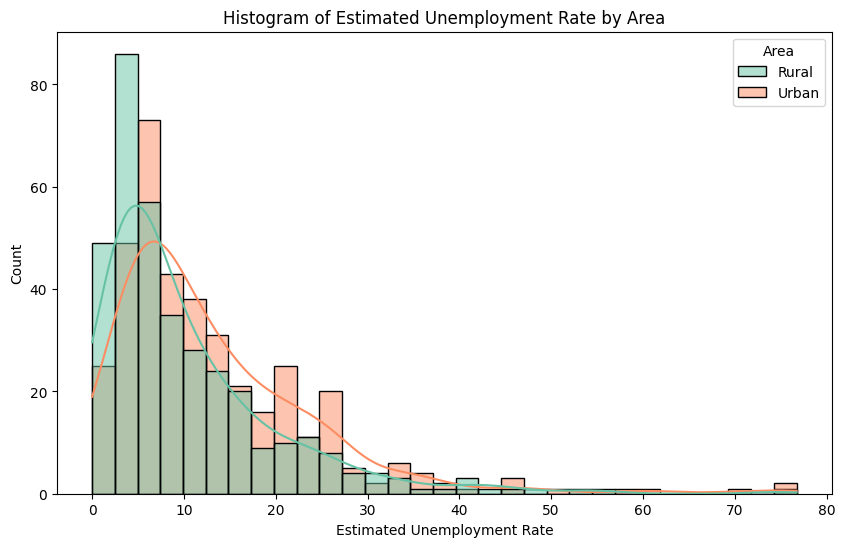

In [40]:
# Histogram of Estimated Unemployment Rate by Area

plt.style.use("default")

df.columns = ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area']
plt.figure(figsize=(10, 6))
sns.histplot(x=' Estimated Unemployment Rate (%)', hue="Area", data=df, kde=True, palette="Set2")
plt.title("Histogram of Estimated Unemployment Rate by Area")
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Count")
plt.show()

**4: Distribution of Estimated Unemployment Rate by Region**

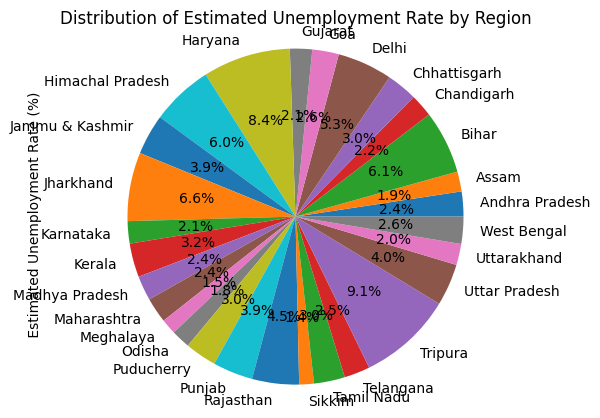

In [39]:
# Distribution of Estimated UnEmployement Rate by Region

data = df[['Region', ' Estimated Unemployment Rate (%)']]
data_grouped = df.groupby('Region')[' Estimated Unemployment Rate (%)'].sum()
data_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Estimated Unemployment Rate by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**5: Data Preprocessing and Feature Engineering**

In [45]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [47]:
df2.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

# Converting 'Date' column to datetime format
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
df2['Frequency'] = df2['Frequency'].astype('category')
df2['Region'] = df2['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
df2['Month'] = df2['Date'].dt.month

# Converting 'Month' to integer format
df2['Month_int'] = df2['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
df2['Month_name'] = df2['Month_int'].apply(lambda x: calendar.month_abbr[x])
df2.drop(columns= 'Month',inplace = True)

**6: Sunburst Chart for Unemployment Rate in Each Region and State**

In [48]:
# Sunburst chart showing unemployment rate in each region and state

unemplo_df = df2[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
unemplo = unemplo_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region', 'States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')
fig.show()

**7: Geo Scatter Plot for Impact of Lockdown on Employment**

In [50]:
fig = px.scatter_geo(df2,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='seaborn',title='Impack of lockdown on Employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#3399FF",
    showocean=True)

fig.show()